In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns

In [ ]:
eq = pd.read_csv("earthquake_final.csv")
eq

,Unnamed: 0,Unnamed: 0.1,Year,Month,Day,Weekday,Hour,Minute,Second,Latitude,Longitude,Depth,Magnitude,TypeMag,smaj,smin,az,rms,cPhase,Region,Mag Range,kategori
0,0,0,2009,Jan,1,Thu,1,26,4,3.73,127.34,67.0,4.6,MLv,10317.000,1804.000,147,0.398,25,"Talaud Islands, Indonesia",4-5,Ringan
1,1,1,2009,Jan,1,Thu,3,45,0,-6.84,130.22,103.0,5.2,mb,22841.000,2778.000,48,2101.000,37,Banda Sea,5-6,Sedang
2,2,2,2009,Jan,1,Thu,5,27,8,1.45,120.74,10.0,5.1,MLv,10432.000,1.540,121,1936.000,20,"Minahassa Peninsula, Sulawesi",5-6,Sedang
3,3,3,2009,Jan,1,Thu,8,42,9,1.52,122.01,10.0,4.5,MLv,7557.000,1043.000,136,0.826,10,"Minahassa Peninsula, Sulawesi",4-5,Ringan
4,4,4,2009,Jan,1,Thu,8,57,1,-8.44,116.17,91.0,3.4,MLv,2699.000,0.193,261,0.413,10,"Sumbawa Region, Indonesia",3-4,Kecil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70626,70626,70626,2018,Aug,3,Fri,21,17,24,-8.46,116.53,10.0,2.2,MLv,1.358,0.435,181,0.655,7,"Sumbawa Region, Indonesia",2-3,Sangat Kecil
70627,70627,70627,2018,Aug,3,Fri,21,28,19,-8.71,116.36,10.0,2.5,MLv,2.042,0.387,189,0.480,7,"Sumbawa Region, Indonesia",2-3,Sangat Kecil
70628,70628,70628,2018,Aug,3,Fri,22,9,47,-9.50,120.77,68.0,4.0,MLv,3.457,1.447,286,0.858,5,"Sumba Region, Indonesia",3-4,Kecil
70629,70629,70629,2018,Aug,3,Fri,23,56,38,-8.58,116.49,17.0,2.9,MLv,6.771,0.414,161,0.328,10,"Sumbawa Region, Indonesia",2-3,Sangat Kecil


In [ ]:
eq_year = eq.groupby(by=['Year'], as_index=False).agg(total_earthquake=('Year', len))
eq_year.sort_values(by=['Year'], ascending=True, inplace=False)
eq_year

,Year,total_earthquake
0,2009,4723
1,2010,7388
2,2011,6225
3,2012,8506
4,2013,5854
5,2014,7212
6,2015,7194
7,2016,7989
8,2017,8873
9,2018,6667


In [ ]:
x = eq_year['Year'].values.reshape(-1,1)
y = eq_year['total_earthquake'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[133.30919765]]
[-261459.78082192]


Persamaan --> y = 133.31*x - 261459.78

In [ ]:
lin_reg.score(x_test, y_test)

0.3562117837204347

(4497.0712254277405, 9467.504266017455)

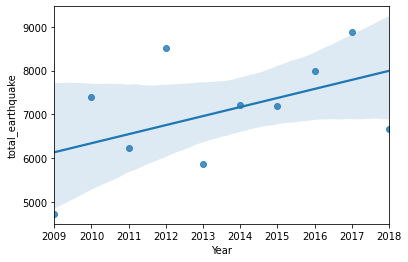

In [ ]:
sns.regplot(x='Year',y='total_earthquake', data=eq_year)
plt.ylim()

In [ ]:
np.round(lin_reg.predict([[2019]]))

array([[7691.]])

In [ ]:
np.round(lin_reg.predict([[2020]]))

array([[7825.]])

In [ ]:


eq_yk = eq.groupby(by=['Year','kategori'], as_index=False).agg(total_earthquake=('Year', len))
eq_yk.sort_values(by=['Year','kategori'], ascending=True, inplace=False)
eq_yk

,Year,kategori,total_earthquake
0,2009,Besar,12
1,2009,Kecil,1394
2,2009,Kuat,95
3,2009,Ringan,2020
4,2009,Sangat Besar,1
...,...,...,...
70,2018,Kuat,31
71,2018,Ringan,1910
72,2018,Sangat Kecil,1695
73,2018,Sedang,528


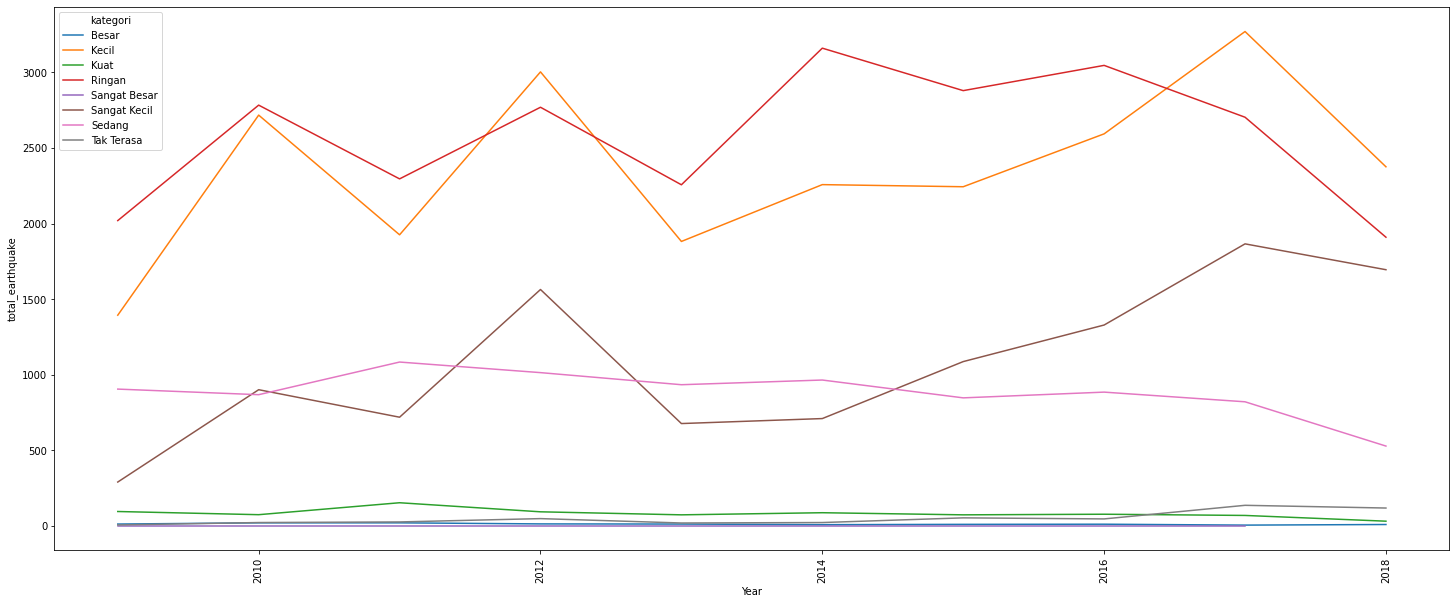

In [ ]:
plt.figure(figsize=(25,10))
sns.lineplot(x = "Year", y = "total_earthquake", hue = "kategori", data = eq_yk)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
from sklearn.pipeline import make_pipeline


In [ ]:
eq_yk = eq.groupby(by=['Year','kategori'], as_index=False).agg(total_earthquake=('Year', len))
eq_yk.sort_values(by=['Year'], ascending=True, inplace=False)
eq_yk

,Year,kategori,total_earthquake
0,2009,Besar,12
1,2009,Kecil,1394
2,2009,Kuat,95
3,2009,Ringan,2020
4,2009,Sangat Besar,1
...,...,...,...
70,2018,Kuat,31
71,2018,Ringan,1910
72,2018,Sangat Kecil,1695
73,2018,Sedang,528


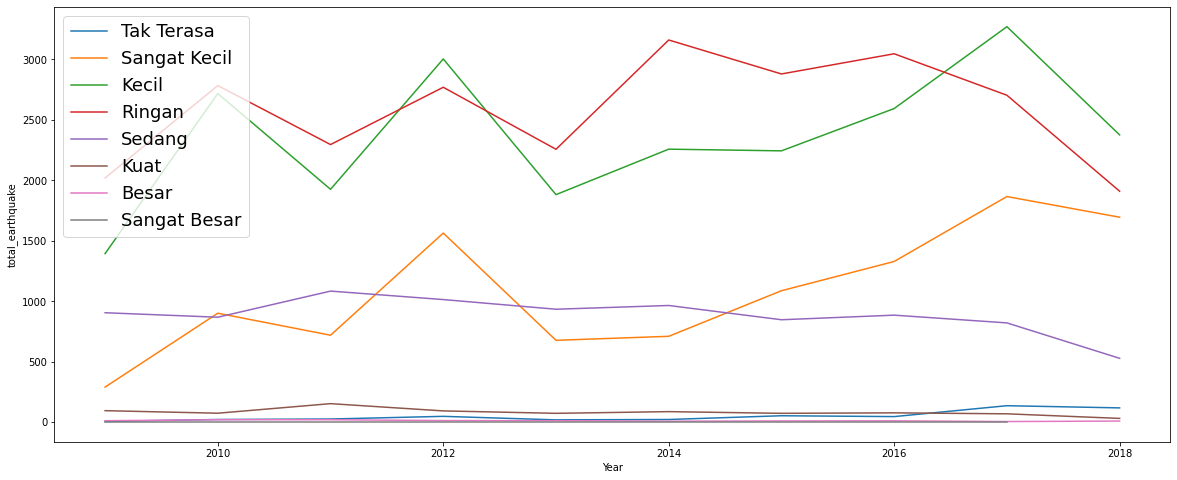

In [ ]:
range1 = eq_yk.loc[eq_yk.loc[:, 'kategori']=='Tak Terasa',:]
range2 = eq_yk.loc[eq_yk.loc[:, 'kategori']=='Sangat Kecil',:]
range3 = eq_yk.loc[eq_yk.loc[:, 'kategori']=='Kecil',:]
range4 = eq_yk.loc[eq_yk.loc[:, 'kategori']=='Ringan',:]
range5 = eq_yk.loc[eq_yk.loc[:, 'kategori']=='Sedang',:]
range6 = eq_yk.loc[eq_yk.loc[:, 'kategori']=='Kuat',:]
range7 = eq_yk.loc[eq_yk.loc[:, 'kategori']=='Besar',:]
range8 = eq_yk.loc[eq_yk.loc[:, 'kategori']=='Sangat Besar',:]

plt.figure(figsize=(20,8))

lp1 = sns.lineplot(x = 'Year' , y = 'total_earthquake' , data = range1)
lp2 = sns.lineplot(x = 'Year' , y = 'total_earthquake' , data = range2)
lp3 = sns.lineplot(x = 'Year' , y = 'total_earthquake' , data = range3)
lp4 = sns.lineplot(x = 'Year' , y = 'total_earthquake' , data = range4)
lp5 = sns.lineplot(x = 'Year' , y = 'total_earthquake' , data = range5)
lp6 = sns.lineplot(x = 'Year' , y = 'total_earthquake' , data = range6)
lp7 = sns.lineplot(x = 'Year' , y = 'total_earthquake' , data = range7)
lp8 = sns.lineplot(x = 'Year' , y = 'total_earthquake' , data = range8)

#leg1 = plt.legend(['Tak Terasa','Sangat Kecil', 'Kecil'],prop={"size":15})
leg1 = plt.legend(['Tak Terasa','Sangat Kecil', 'Kecil', 'Ringan', 'Sedang', 'Kuat', 'Besar', 'Sangat Besar'],prop={"size":18})

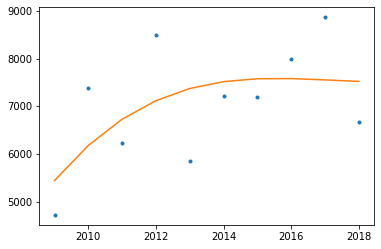

array([-3.08121225e+08])

In [ ]:
x = eq_year['Year'].values.reshape(-1,1)
y = eq_year['total_earthquake'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

a = PolynomialFeatures(10)
modelo = make_pipeline(a, LinearRegression())
modelo.fit(x, y)
plt.plot(x,y,'.')
plt.plot(x, modelo.predict(x),'-')
plt.show()

modelo.steps[1][1].coef_

modelo.steps[1][1].intercept_

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

x_poly = a.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

966.6278507057938
0.3400018998451997


In [ ]:
np.round(a.predict([[2019]]))

AttributeError: ignored